In [158]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import OneClassSVM
from sklearn import preprocessing

In [159]:
train = pd.read_csv("data/train.csv")

In [160]:
predict = pd.read_csv("data/predict.csv")

In [176]:
#Functions: 
def encode(csv):
    cut = csv.cut
    color = csv.color
    clarity = csv.clarity

    le_cut = preprocessing.LabelEncoder()
    le_color = preprocessing.LabelEncoder()
    le_clarity = preprocessing.LabelEncoder()

    cut_numeric = le_cut.fit_transform(cut)
    color_numeric = le_color.fit_transform(color)
    clarity_numeric = le_clarity.fit_transform(clarity)
    clean = csv.copy()
    clean["cut_numeric"] = cut_numeric
    clean["color_numeric"] = color_numeric
    clean["clarity_numeric"] = clarity_numeric
    clean.drop(columns=["cut", "color", "clarity"], inplace = True)
    return clean

In [163]:
def split(csv):
    X = csv.loc[:, csv.columns != "price"]
    y = csv["price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [164]:
def printMetrics(y_test,y_pred):
    printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    printMetric("Precision",precision_score(y_test, y_pred, average = "weighted"))
    printMetric("Recall",recall_score(y_test, y_pred, average = "weighted"))
    printMetric("F1Score",f1_score(y_test, y_pred, average = "weighted"))
    printMetric("Mean Square Error", mean_squared_error(y_test,y_pred))
    printMetric("Root Mean Square Error", mean_squared_error(y_test,y_pred, squared = False))

In [165]:
def fitModel(model):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [166]:
def predictModel(model, f = ['carat','table','x','y','z','color_numeric','cut_numeric','clarity_numeric', 'depth']):
    model = model
    m = model.fit(X_train, y_train)
    prediction = model.predict(encode(predict)[f])
    return prediction

# Inspecting the Data

In [9]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [10]:
train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Non numeric values
### Cut | Color | Clarity 

In [11]:
train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [12]:
train.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,0.002653,0.002349,-0.006281,0.001529,0.001976,0.004030,0.006826
carat,0.002653,1.000000,0.032379,0.181791,0.974898,0.944513,0.947538,0.922567
depth,0.002349,0.032379,1.000000,-0.297164,-0.020876,-0.025105,0.099375,-0.005105
table,-0.006281,0.181791,-0.297164,1.000000,0.194763,0.181585,0.149242,0.129777
x,0.001529,0.974898,-0.020876,0.194763,1.000000,0.967114,0.965114,0.884089
y,0.001976,0.944513,-0.025105,0.181585,0.967114,1.000000,0.940678,0.858536
z,0.004030,0.947538,0.099375,0.149242,0.965114,0.940678,1.000000,0.855923
price,0.006826,0.922567,-0.005105,0.129777,0.884089,0.858536,0.855923,1.000000


In [13]:
print(train.color.value_counts(),"\n\n",
train.cut.value_counts(),"\n\n",
train.clarity.value_counts())

G    8469
E    7375
F    7179
H    6229
D    5012
I    4088
J    2103
Name: color, dtype: int64 

 Ideal        16175
Premium      10272
Very Good     9146
Good          3676
Fair          1186
Name: cut, dtype: int64 

 SI1     9813
VS2     9217
SI2     6844
VS1     6150
VVS2    3784
VVS1    2780
IF      1326
I1       541
Name: clarity, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

## Encoding...   
### Cut | Color | Clarity 

**Label Encoder**

In [57]:
train_clean = encode(train)

In [16]:
train_clean.dtypes

id                   int64
carat              float64
depth              float64
table              float64
x                  float64
y                  float64
z                  float64
price                int64
cut_numeric          int64
color_numeric        int64
clarity_numeric      int64
dtype: object

In [58]:
train_clean.corr()

,id,carat,depth,table,x,y,z,price,cut_numeric,color_numeric,clarity_numeric
id,1.000000,0.002653,0.002349,-0.006281,0.001529,0.001976,0.004030,0.006826,0.001979,-0.007942,0.002959
carat,0.002653,1.000000,0.032379,0.181791,0.974898,0.944513,0.947538,0.922567,0.020662,0.289150,-0.212821
depth,0.002349,0.032379,1.000000,-0.297164,-0.020876,-0.025105,0.099375,-0.005105,-0.188766,0.046420,-0.054104
table,-0.006281,0.181791,-0.297164,1.000000,0.194763,0.181585,0.149242,0.129777,0.149559,0.026387,-0.084703
x,0.001529,0.974898,-0.020876,0.194763,1.000000,0.967114,0.965114,0.884089,0.025532,0.267955,-0.224169
y,0.001976,0.944513,-0.025105,0.181585,0.967114,1.000000,0.940678,0.858536,0.030438,0.259464,-0.214578
z,0.004030,0.947538,0.099375,0.149242,0.965114,0.940678,1.000000,0.855923,0.005945,0.263969,-0.221445
price,0.006826,0.922567,-0.005105,0.129777,0.884089,0.858536,0.855923,1.000000,0.040733,0.171269,-0.072106
cut_numeric,0.001979,0.020662,-0.188766,0.149559,0.025532,0.030438,0.005945,0.040733,1.000000,0.002828,0.025718
color_numeric,-0.007942,0.289150,0.046420,0.026387,0.267955,0.259464,0.263969,0.171269,0.002828,1.000000,-0.025578


**Encode manually with map and dictionary**

In [53]:
#Encodimng manually - worst to best (same correlation)
cut = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
color = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}
clarity = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}

In [55]:
train_c = train.copy()
train_c["cut"] = train_c["cut"].map(cut)
train_c["color"] = train_c["color"].map(color)
train_c["clarity"] = train_c["clarity"].map(clarity)

In [59]:
train_c.corr()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,0.002653,0.005771,-0.007942,0.001663,0.002349,-0.006281,0.001529,0.001976,0.004030,0.006826
carat,0.002653,1.000000,-0.134795,0.289150,-0.350963,0.032379,0.181791,0.974898,0.944513,0.947538,0.922567
cut,0.005771,-0.134795,1.000000,-0.022033,0.184704,-0.215764,-0.431573,-0.125150,-0.120065,-0.148201,-0.054962
color,-0.007942,0.289150,-0.022033,1.000000,0.030075,0.046420,0.026387,0.267955,0.259464,0.263969,0.171269
clarity,0.001663,-0.350963,0.184704,0.030075,1.000000,-0.069356,-0.155587,-0.370284,-0.354168,-0.363065,-0.146770
depth,0.002349,0.032379,-0.215764,0.046420,-0.069356,1.000000,-0.297164,-0.020876,-0.025105,0.099375,-0.005105
table,-0.006281,0.181791,-0.431573,0.026387,-0.155587,-0.297164,1.000000,0.194763,0.181585,0.149242,0.129777
x,0.001529,0.974898,-0.125150,0.267955,-0.370284,-0.020876,0.194763,1.000000,0.967114,0.965114,0.884089
y,0.001976,0.944513,-0.120065,0.259464,-0.354168,-0.025105,0.181585,0.967114,1.000000,0.940678,0.858536
z,0.004030,0.947538,-0.148201,0.263969,-0.363065,0.099375,0.149242,0.965114,0.940678,1.000000,0.855923


## Initial Attempt - Tree . Extra Tree Classifier

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier

In [18]:
X_train, X_test, y_train, y_test = split(train_clean)

In [19]:
auto_model = ExtraTreeClassifier()  
auto_model.fit(X_train, y_train)

ExtraTreeClassifier()

In [20]:
y_pred = auto_model.predict(X_test)

In [21]:
results = pd.DataFrame(y_pred, columns=["Prediction"])
results["Ground Truth"] = list(y_test)

**The mean_squared_error function computes mean square error,   
a risk metric corresponding to the expected value of the squared   
(quadratic) error or loss**


In [22]:
printMetrics(y_test,y_pred)

	 Accuracy: 0.073
	 Precision: 0.078
	 Recall: 0.073
	 F1Score: 0.071
	 Mean Square Error: 1840610.468
	 Root Mean Square Error: 1356.691


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cleaning the data

### Features


In [60]:
#all features except id
features_0 = ['carat','table','x','y','z','price','color_numeric','cut_numeric', 'clarity_numeric', 'depth']

#getting rid of id, depth
features_1 = ['carat','table','x','y','z','price','color_numeric','cut_numeric', 'clarity_numeric']

#getting rid of id, depth, cut_numeric, clarity_numeric
features_2 = ['carat','table','x','y','z','price','color_numeric']

#getting rid of id, x, y, z
features_3 = ['carat','table','depth','price','color_numeric','cut_numeric', 'clarity_numeric']

#getting rid of id, depth, cut_numeric, clarity_numeric, table, color_numeric
features_4 = ['carat','x','y','z','price']

# Testing Different Model Metrics  
  
### DecisionTreeClassifier

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [136]:
#Features_All
csv = train_clean[features_0]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)


	 Accuracy: 0.141
	 Precision: 0.155
	 Recall: 0.141
	 F1Score: 0.139
	 Mean Square Error: 1482087.151
	 Root Mean Square Error: 1217.41


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


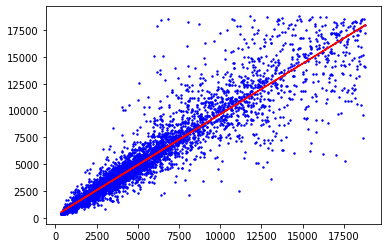

In [137]:
plt.scatter(y_test,y_pred, s=2, color = "b")

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color = "r")

In [27]:
#Features_1
csv = train_clean[features_1]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)

	 Accuracy: 0.148
	 Precision: 0.167
	 Recall: 0.148
	 F1Score: 0.148
	 Mean Square Error: 1308136.024
	 Root Mean Square Error: 1143.738


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#Features_2
csv = train_clean[features_2]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)


	 Accuracy: 0.054
	 Precision: 0.062
	 Recall: 0.054
	 F1Score: 0.054
	 Mean Square Error: 2755981.658
	 Root Mean Square Error: 1660.115


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Features_3
csv = train_clean[features_3]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)

	 Accuracy: 0.089
	 Precision: 0.095
	 Recall: 0.089
	 F1Score: 0.085
	 Mean Square Error: 1083699.449
	 Root Mean Square Error: 1041.009


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#Features_4
csv = train_clean[features_4]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)

	 Accuracy: 0.021
	 Precision: 0.024
	 Recall: 0.021
	 F1Score: 0.021
	 Mean Square Error: 3509457.45
	 Root Mean Square Error: 1873.355


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ExtraTreeClassifier

In [30]:
from sklearn.tree import ExtraTreeClassifier

In [31]:
#Features_0
csv = train_clean[features_0]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(ExtraTreeClassifier())
printMetrics(y_test,y_pred)

	 Accuracy: 0.096
	 Precision: 0.106
	 Recall: 0.096
	 F1Score: 0.094
	 Mean Square Error: 1544529.048
	 Root Mean Square Error: 1242.791


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#Features_1
csv = train_clean[features_1]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(ExtraTreeClassifier())
printMetrics(y_test,y_pred)

	 Accuracy: 0.094
	 Precision: 0.102
	 Recall: 0.094
	 F1Score: 0.092
	 Mean Square Error: 1633268.547
	 Root Mean Square Error: 1277.994


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#Features_2
csv = train_clean[features_2]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(ExtraTreeClassifier())
printMetrics(y_test,y_pred)

	 Accuracy: 0.042
	 Precision: 0.047
	 Recall: 0.042
	 F1Score: 0.041
	 Mean Square Error: 2616819.138
	 Root Mean Square Error: 1617.659


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#Features_3
csv = train_clean[features_3]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(ExtraTreeClassifier())
printMetrics(y_test,y_pred)

	 Accuracy: 0.045
	 Precision: 0.049
	 Recall: 0.045
	 F1Score: 0.043
	 Mean Square Error: 2487258.905
	 Root Mean Square Error: 1577.105


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
#Features_0

csv = train_clean[features_0]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(KNeighborsClassifier(n_neighbors=3))
printMetrics(y_test,y_pred)

	 Accuracy: 0.029
	 Precision: 0.031
	 Recall: 0.029
	 F1Score: 0.027
	 Mean Square Error: 2140266.729
	 Root Mean Square Error: 1462.965


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
#Features_1
csv = train_clean[features_1]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(KNeighborsClassifier(n_neighbors=3))
printMetrics(y_test,y_pred)

	 Accuracy: 0.063
	 Precision: 0.073
	 Recall: 0.063
	 F1Score: 0.061
	 Mean Square Error: 1548110.36
	 Root Mean Square Error: 1244.231


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


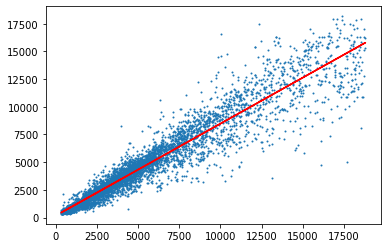

In [139]:
plt.scatter(y_test,y_pred, s=1)

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color = "r")

In [39]:
#Features_2
csv = train_clean[features_2]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(KNeighborsClassifier(n_neighbors=3))
print(type(y_test),type(y_pred))
printMetrics(y_test,y_pred)

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
	 Accuracy: 0.033
	 Precision: 0.036
	 Recall: 0.033
	 F1Score: 0.031
	 Mean Square Error: 2868167.404
	 Root Mean Square Error: 1693.566


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTreeRegressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [140]:
csv = train_clean[features_0]
csv
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeRegressor())
y_pred = y_pred.round()

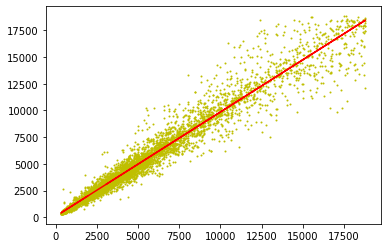

In [141]:
plt.scatter(y_test,y_pred, s=1, color = "y")

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color = "r")

In [89]:
printMetrics(y_test,y_pred)

	 Accuracy: 0.12
	 Precision: 0.135
	 Recall: 0.12
	 F1Score: 0.119
	 Mean Square Error: 559915.435
	 Root Mean Square Error: 748.275


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForestRegressor


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [142]:
#Features_0

csv = train_clean[features_0]
csv
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(RandomForestRegressor(random_state=0))
y_pred = y_pred.round()
printMetrics(y_test,y_pred)

	 Accuracy: 0.005
	 Precision: 0.012
	 Recall: 0.005
	 F1Score: 0.006
	 Mean Square Error: 314167.476
	 Root Mean Square Error: 560.506


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


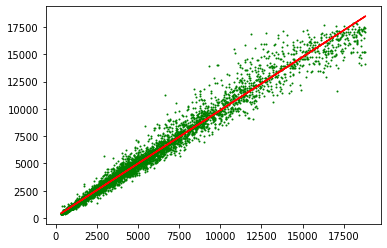

In [143]:
plt.scatter(y_test,y_pred, s=1, c = "g")

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color = "r")

In [90]:
#Features_1

csv = train_clean[features_1]
csv
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(RandomForestRegressor(random_state=0))
y_pred = y_pred.round()
printMetrics(y_test,y_pred)

	 Accuracy: 0.006
	 Precision: 0.013
	 Recall: 0.006
	 F1Score: 0.007
	 Mean Square Error: 332734.604
	 Root Mean Square Error: 576.832


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
#Features_3

csv = train_clean[features_3]
csv
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(RandomForestRegressor(random_state=0))
y_pred = y_pred.round()
printMetrics(y_test,y_pred)


	 Accuracy: 0.004
	 Precision: 0.006
	 Recall: 0.004
	 F1Score: 0.004
	 Mean Square Error: 300337.564
	 Root Mean Square Error: 548.031


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
#Trying other parameters

csv = train_clean[features_3]
csv
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(RandomForestRegressor(random_state=0, warm_start=True))
y_pred = y_pred.round()
printMetrics(y_test,y_pred)

	 Accuracy: 0.003
	 Precision: 0.006
	 Recall: 0.003
	 F1Score: 0.004
	 Mean Square Error: 323907.676
	 Root Mean Square Error: 569.129


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Grid Search - Takes too long

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [206]:
parameters = {"n_estimators":[10, 100, 100],  
              "max_features":["auto", "sqrt", "log2"], "bootstrap":[True, False], 
              "warm_start":[True, False]}


In [207]:
model = RandomForestRegressor(random_state=0)
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 100],
                         'warm_start': [True, False]})

In [216]:
print("\n The best estimator across ALL searched params:\n",
          clf.best_estimator_)
print("\n The best score across ALL searched params:\n",
          clf.best_score_)
print("\n The best parameters across ALL searched params:\n",
          clf.best_params_)


 The best estimator across ALL searched params:
 RandomForestRegressor(random_state=0, warm_start=True)

 The best score across ALL searched params:
 0.9791936260737424

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 100, 'warm_start': True}


## ExportingPredictions


In [182]:
"""# Extra Tree Classifier - features:all
X_train, X_test, y_train, y_test = split(train_clean)
results1 = predictModel(ExtraTreeClassifier(), f=[['id','carat','table','x','y','z','price','color_numeric','cut_numeric', 'clarity_numeric', 'depth']])
results1 = pd.DataFrame(results, columns=["price"])"""

'# Extra Tree Classifier - features:all\nX_train, X_test, y_train, y_test = split(train_clean)\nresults1 = predictModel(ExtraTreeClassifier(), f=[[\'id\',\'carat\',\'table\',\'x\',\'y\',\'z\',\'price\',\'color_numeric\',\'cut_numeric\', \'clarity_numeric\', \'depth\']])\nresults1 = pd.DataFrame(results, columns=["price"])'

In [ ]:
#results.to_csv("outputs/1.1")

In [ ]:
"""
csv = train_clean[features_1]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)
"""

In [ ]:
# Decision Tree Classifier - features: all except "id" and "depth"

X_train, X_test, y_train, y_test = split(train_clean[features_1])
results2 = predictModel(DecisionTreeClassifier(random_state=0))
results2 = pd.DataFrame(results, columns=["price"])

In [ ]:
#wrong
results2

In [ ]:
#results2.to_csv("outputs/1.2")

In [ ]:
# Decision Tree Classifier - features: all except "id" and "depth"

"""X_train, X_test, y_train, y_test = split(train_clean[features_1])
results3 = predictModel(DecisionTreeClassifier(random_state=0))
results3 = pd.DataFrame(results3, columns=["price"])"""

In [ ]:
results3 

In [91]:
#results3.to_csv("outputs/1.3")

In [177]:
# Random Forest Regressor - features: all except "id" and "depth"
"""X_train, X_test, y_train, y_test = split(train_clean[features_0])
results4 = predictModel(RandomForestRegressor(random_state=0))
results4 = pd.DataFrame(results4, columns=["price"])"""

In [178]:
results4

,price
0,15428.05
1,15814.44
2,1002.30
3,435.07
4,3532.76
...,...
13480,2467.89
13481,5035.04
13482,2421.93
13483,1032.44


In [96]:
#results4.to_csv("outputs/1.4")

In [223]:
# Random Forest Regressor(warm_start=True) - features: all except "id", "x", "y" and "z"
X_train, X_test, y_train, y_test = split(train_clean[features_3])
results5 = predictModel(RandomForestRegressor(random_state=0, warm_start=True), f=['carat','table','depth','color_numeric','cut_numeric', 'clarity_numeric'])
results5 = pd.DataFrame(results5, columns=["price"])

In [224]:
results5

,price
0,14707.328333
1,14887.040000
2,1014.059333
3,477.062500
4,3892.700000
...,...
13480,2480.296000
13481,4849.620000
13482,2485.629167
13483,1017.200000


In [225]:
results5.to_csv("outputs/1.5")